# Task Summary
This assignment is broken into 3 parts

Upload the notebook assignment05-population.ipynb to you assignments repository.

## Part 1 - 70%
Write a jupyter notebook that analyses the differences between the sexes by age in Ireland.

Weighted mean age (by sex)
The difference between the sexes by age
This part does not need to look at the regions.

ie You can take the notebook I used in the lectures and substitute the sexes for the regions.

## Part 2 - 20%
In the same notebook, make a variable that stores an age (say 35).

Write that code that would group the people within 5 years of that age together, into one age group 

Calculate the population difference between the sexes in that age group.

## Part 3 - 10%
In the same notebook.

Write the code that would work out which region in Ireland has the biggest population difference between the sexes in that age group

Irish population numbers per sex and age is shown below: 


/tmp/ipykernel_2492/933551855.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_age_sex = dfpopulation_stats[['C02076V03371', 'Sex', 'VALUE', 'Administrative Counties']][dfpopulation_stats['Sex']!= "Both sexes"][dfpopulation_stats['C02076V03371']!= "-"][dfpopulation_stats['Administrative Counties']=="Ireland"].rename(columns={'C02076V03371':'Age'})
/tmp/ipykernel_2492/933551855.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_age_sex = dfpopulation_stats[['C02076V03371', 'Sex', 'VALUE', 'Administrative Counties']][dfpopulation_stats['Sex']!= "Both sexes"][dfpopulation_stats['C02076V03371']!= "-"][dfpopulation_stats['Administrative Counties']=="Ireland"].rename(columns={'C02076V03371':'Age'})


,Age,Female,Male
0,1,27545,28875
1,2,28974,30236
2,3,29483,31001
3,4,29819,31686
4,5,31342,32684
...,...,...,...
96,97,732,217
97,98,492,130
98,99,336,105
99,0,28186,29610


Weighted Mean Age (Male): 37.74
Weighted Mean Age (Female): 38.94


<Axes: title={'center': 'Female and Male Ireland Population by Age'}, xlabel='Age (Years)', ylabel='Population Total (Nr)'>

<Axes: title={'center': 'Difference Female minus Male Ireland Population by Age'}, xlabel='Age (Years)', ylabel='Population Difference Total (Nr)'>

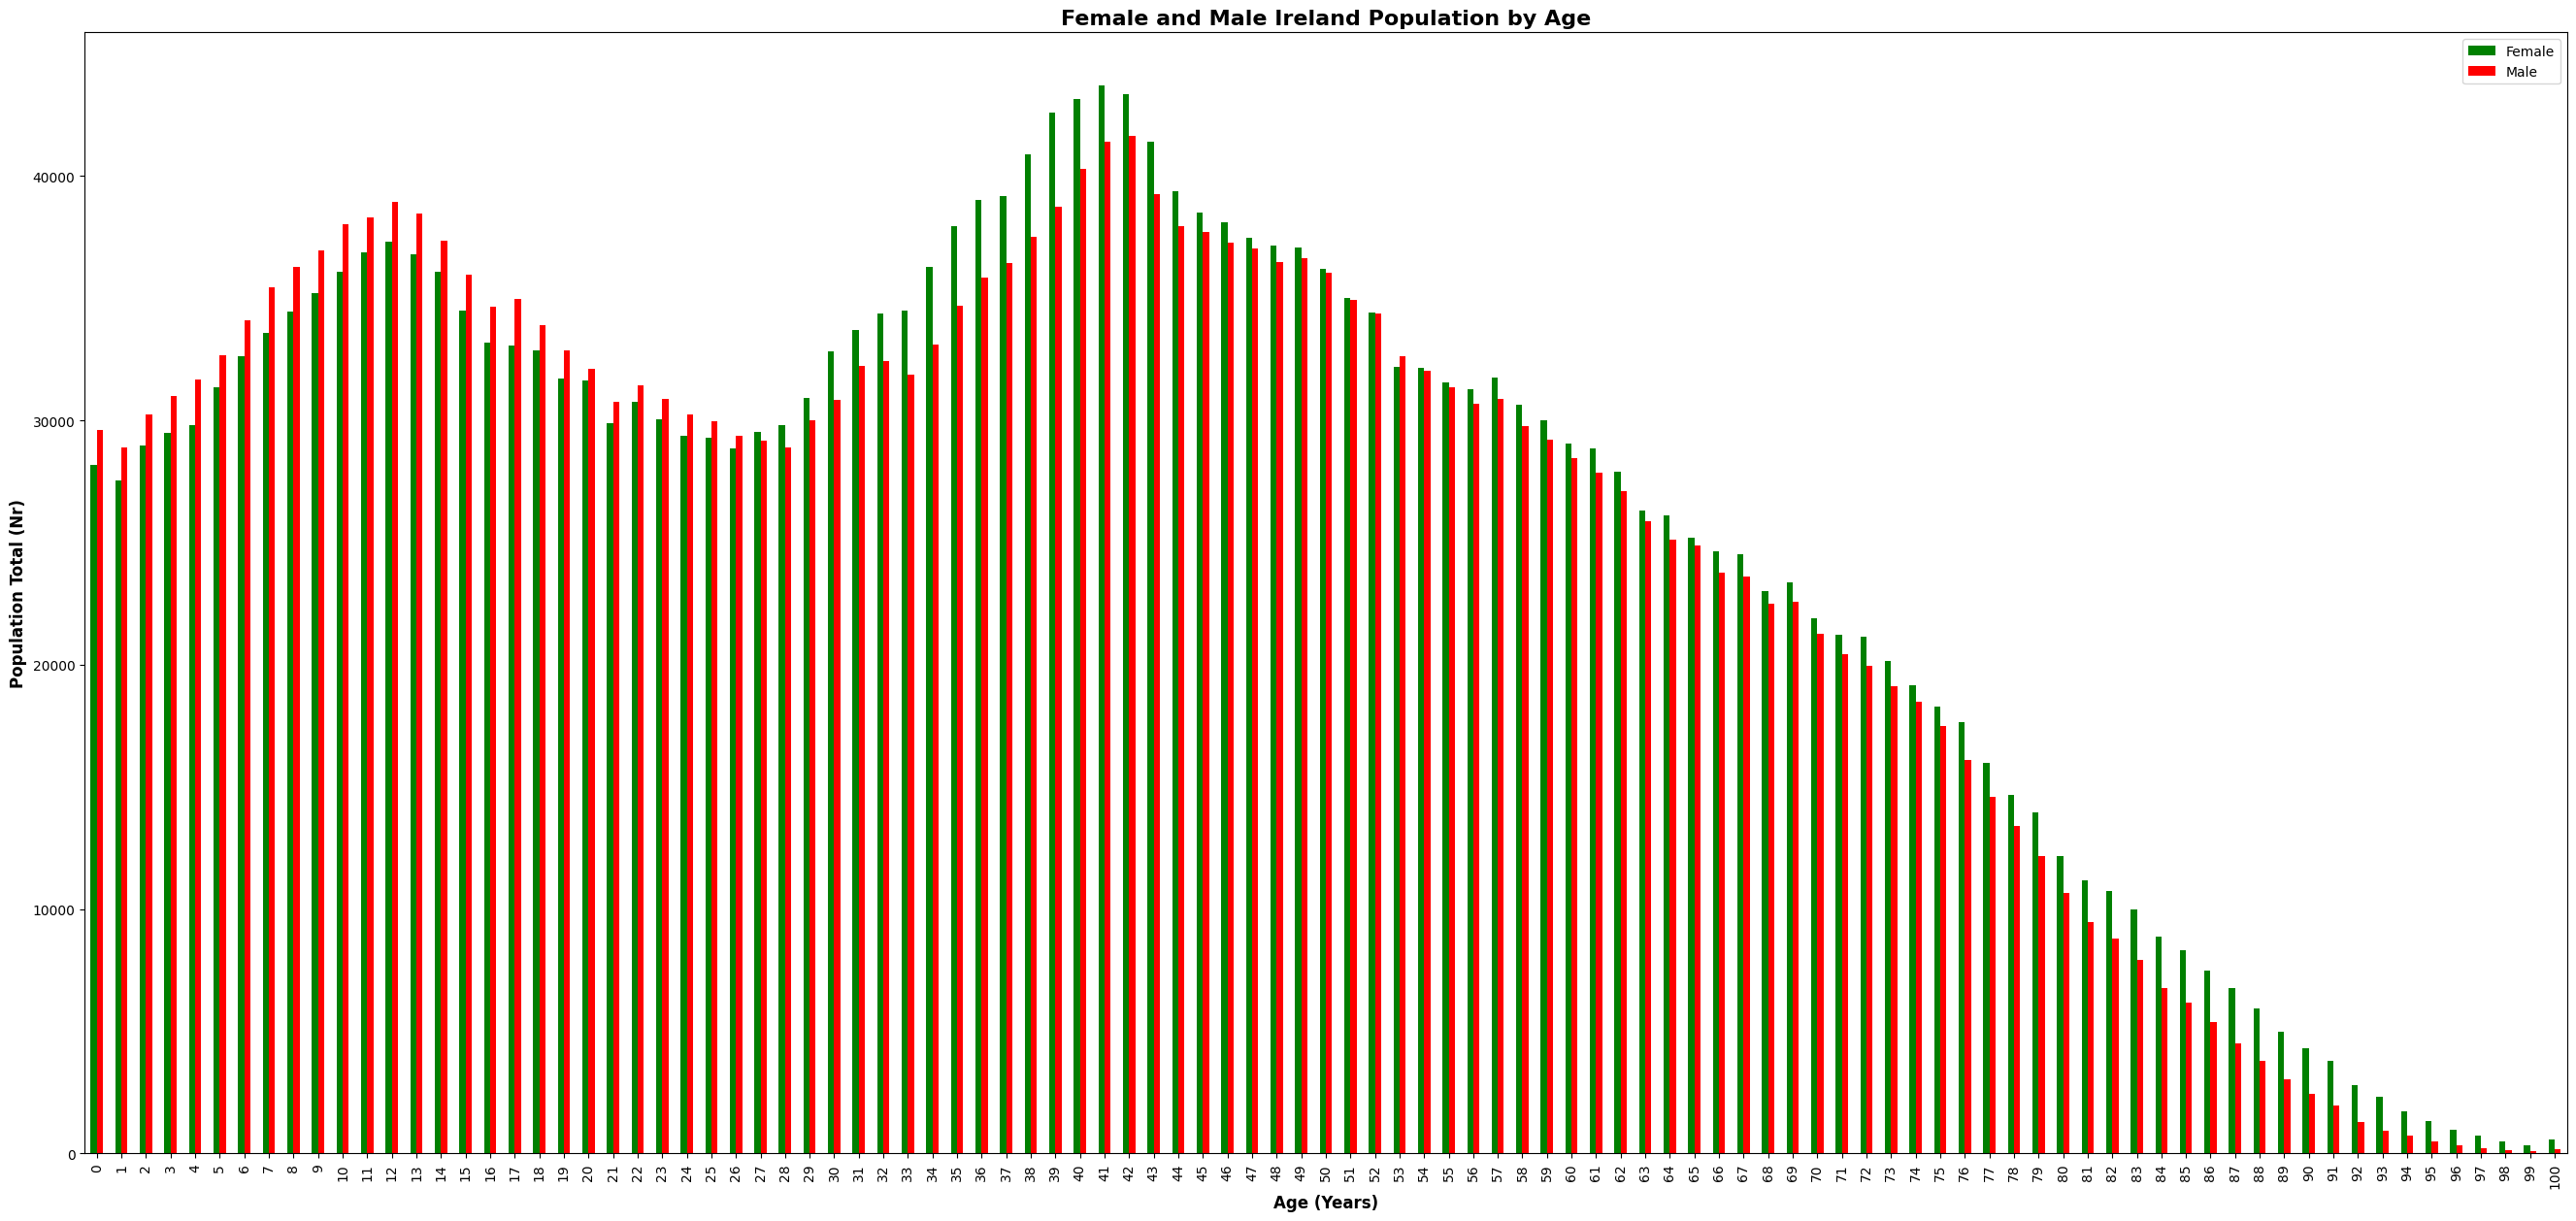

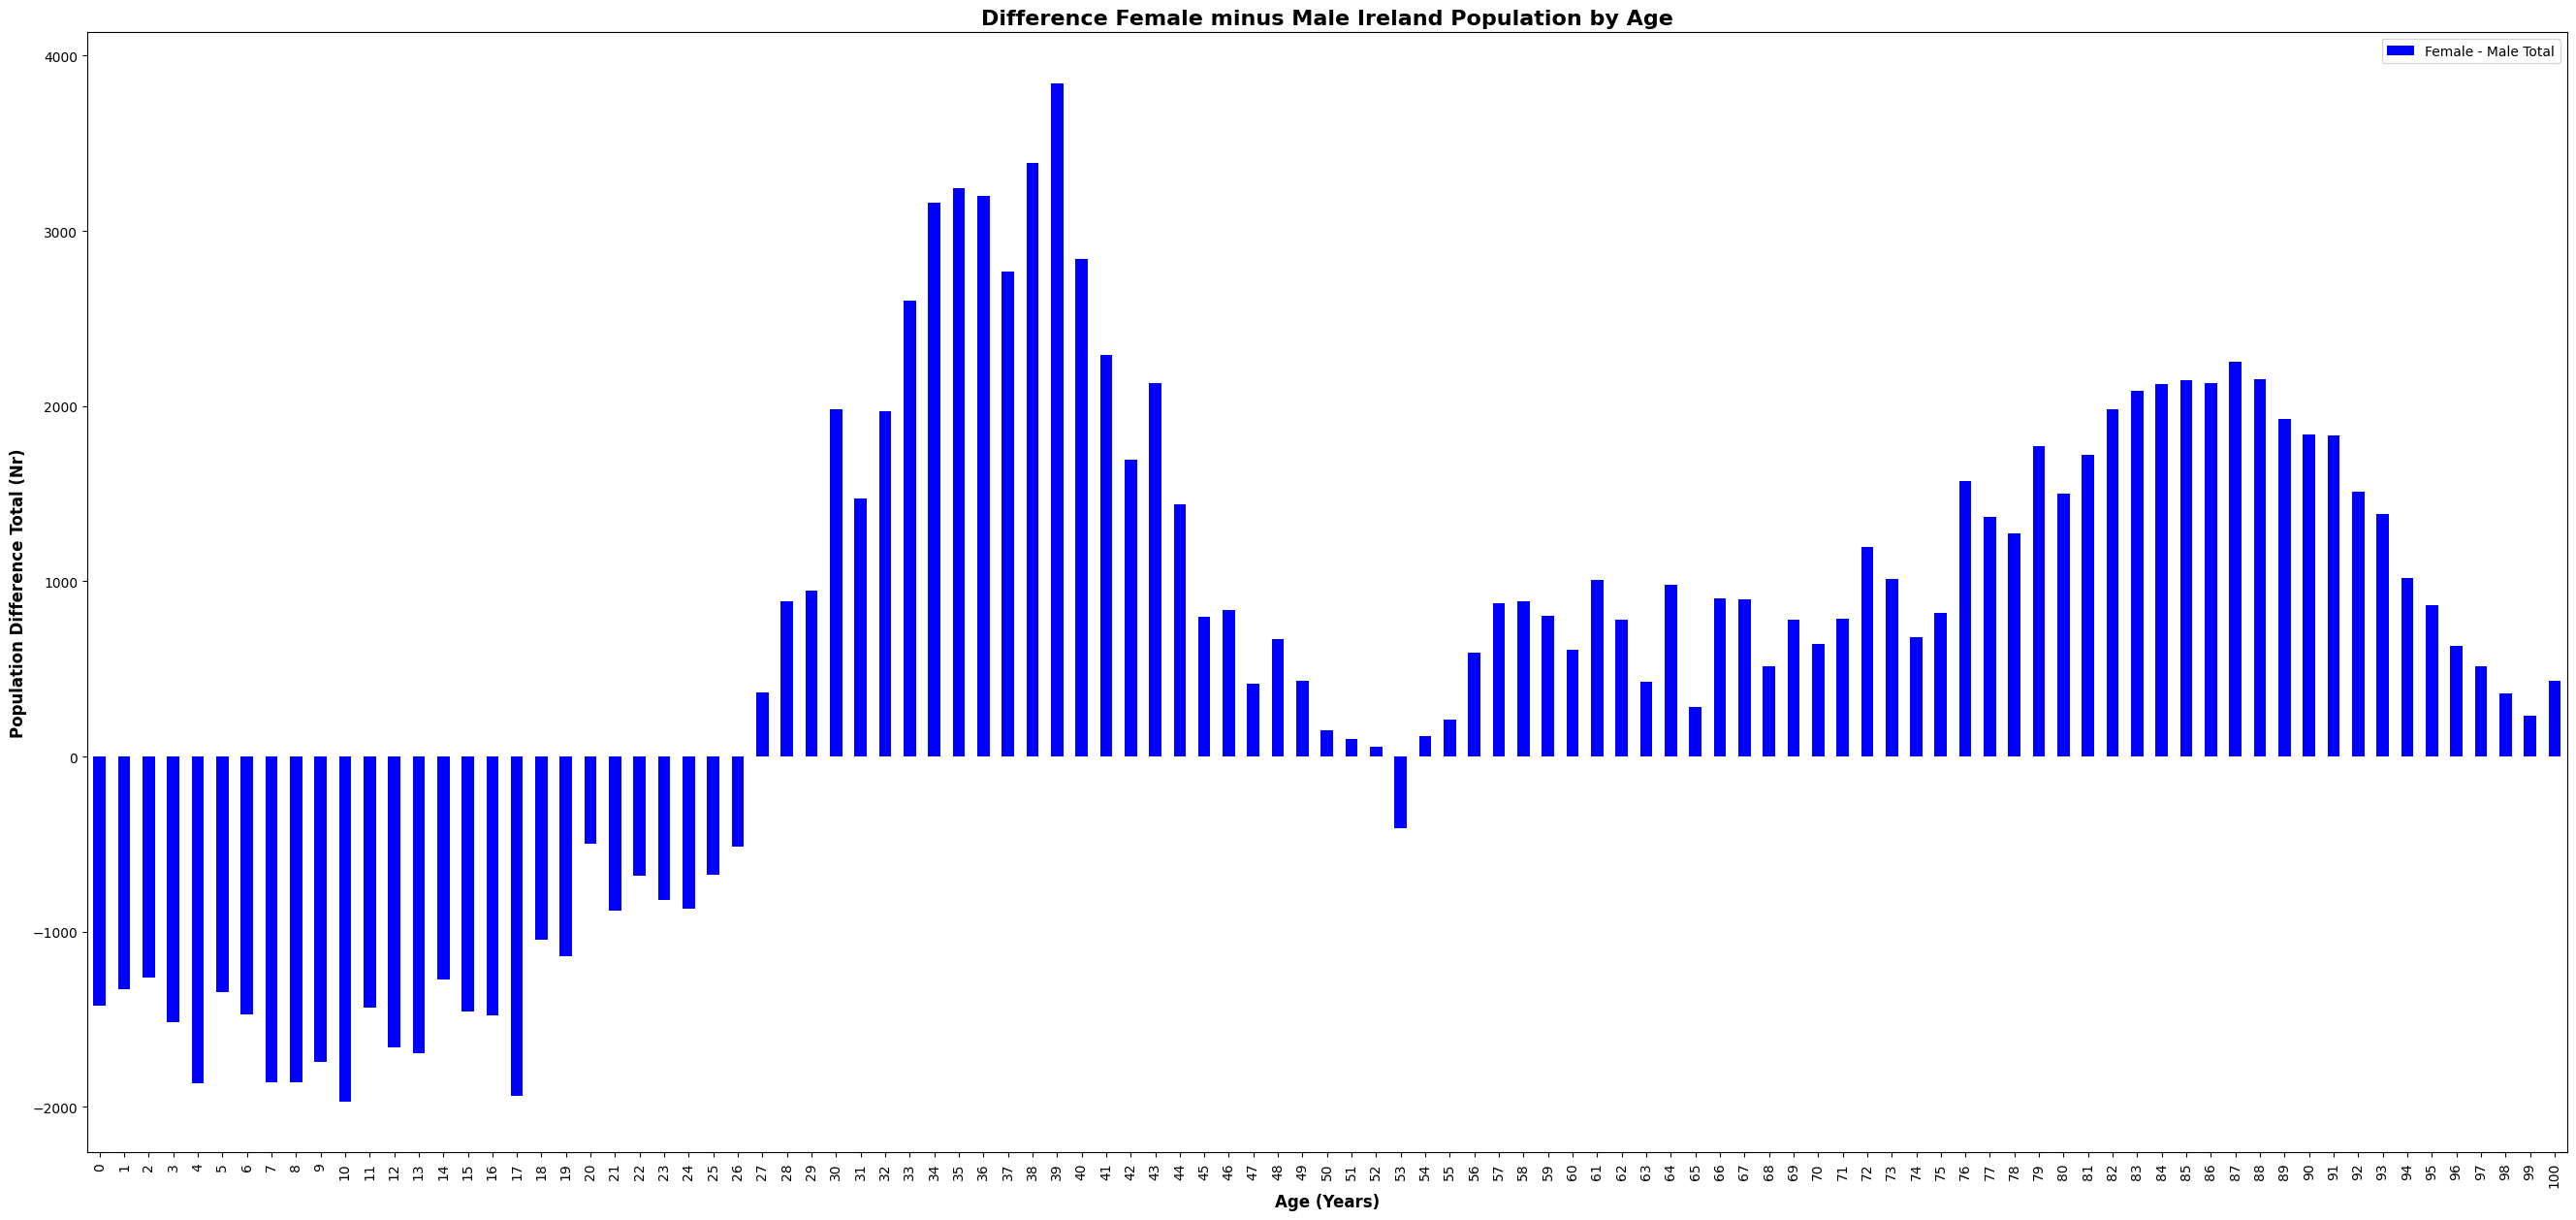

In [ ]:
# PART 1
# Import pandas that I can work with the data in a dataframe format
import pandas as pd

# Import matplotlib for using plots
import matplotlib as plt

# use the url provided in Topic 5 notebook from the lecturer
pop_url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/FY006A/CSV/1.0/en"

# Convert the CSV data into a pandas dataframe
dfpopulation_stats = pd.read_csv(pop_url)
# display(dfpopulation_stats.head()) # check if data displays correctly

# set(dfpopulation_stats['Sex']) # Use set() to check all unique items in each column once duplicates are removed

# make a seperate dataframe that isolates the age, sex and value data as this is what we are focusing on in Part 1. 
# Also I can remove the "Both sexes" data in Sex as they are just the sum of male and female values combined
# Also I can remove the "-" data in C02076V03371 as they are just the sum of all individual ages values combined
# Also I renamed the C02076V03371 column to Age as this is the numerical value of the string for age in column Single Year of Age
# Important also to filter by Administrative Counties as this has total for all ireland and the individual counties
df_age_sex = dfpopulation_stats[['C02076V03371', 'Sex', 'VALUE', 'Administrative Counties']][dfpopulation_stats['Sex']!= "Both sexes"][dfpopulation_stats['C02076V03371']!= "-"][dfpopulation_stats['Administrative Counties']=="Ireland"].rename(columns={'C02076V03371':'Age'})
# display(df_age_sex) # check if data displays correctly
#display(df_age_sex['VALUE'].sum()) # I filtered the data in excel to see what the sum of all male and females are and this was 5,149,139. I sense checked by sum of VALUES column to confirm filter worked correctly

# Convert data into pivot table i.e. shortened format. I had to set aggfunc to sum as by default this gives me the mean and then is no longer a representation of total population per age group
df_analize = pd.pivot_table(df_age_sex, 'VALUE', 'Age', 'Sex', aggfunc = 'sum')
df_analize = df_analize.reset_index() # do this to keep Age as a seperate column and that it doesnt become the index column
df_analize.columns.name = None # remove title from index column
#print(df_analize.sum()) # test to see no data is lost by doing the above pivot table compared to the full version. 
#display(df_analize)

# Now I have to replace the 200 and 650 integer values with something more descriptive. 200 is under 1 year so I will set this to 0 and 650 is 100 years and older so I will set this to 100. 
df_analize['Age'] = df_analize['Age'].replace({'200': '0', '650': '100'}) # use the replace() method
df_analize['Age'] = df_analize['Age'].astype('int64') # convert all values in Age column to integers
print("Irish population numbers per sex and age is shown below: ")
display(df_analize)

# Now I have to calculated the weighted means per sex as per the task
# Lecture notes state Weighted mean is sum(age*population at age) / sum (populations at age)
# Weighted mean for males
w_mean_male = (df_analize['Age'] * df_analize['Male']).sum() / df_analize['Male'].sum()

# Weighted mean for females
w_mean_female = (df_analize['Age'] * df_analize['Female']).sum() / df_analize['Female'].sum()

# display weighted mean values
print("Weighted Mean Age (Male):", f'{w_mean_male:.2f}') # show 2 decimals
print("Weighted Mean Age (Female):", f'{w_mean_female:.2f}') # show 2 decimals

# Now I need to show the difference between the sexes by age. I will try to do this with a plot as this might be the best way to show it
# I will use a bar chart to illustarte this
df_analize = pd.concat([df_analize.loc[[99]], df_analize.drop(99)]) # move index 99 to the front of the dataframe as this is Ago (less than 1 years)
sexes_bar = df_analize.plot.bar(x='Age', y=['Female','Male'], figsize = (33,15), color={'Female': 'green', 'Male': 'red'}) 
sexes_bar.set_title('Female and Male Ireland Population by Age', fontsize=16, weight='bold') # specify a title
sexes_bar.set_ylabel('Population Total (Nr)', fontsize=12, weight='bold') # set name of y axis and bold text
sexes_bar.set_xlabel('Age (Years)', fontsize=12, weight='bold') # set name of x axis and bold text

display(sexes_bar)

# Now I need to make a bar chart showing the differences in Female minus Male
diffsexes_bar = df_analize # set original data to new variable
diffsexes_bar['Female - Male Total'] = diffsexes_bar['Female'] - diffsexes_bar['Male'] # add new column which is the difference between Female minus Male total
# diffsexes_bar test to see if correct
diffsexes_bar = diffsexes_bar.plot.bar(x='Age', y=['Female - Male Total'], figsize = (33,15), color={'Female - Male Total': 'blue'}) 
diffsexes_bar.set_title('Difference Female minus Male Ireland Population by Age', fontsize=16, weight='bold') # specify a title
diffsexes_bar.set_ylabel('Population Difference Total (Nr)', fontsize=12, weight='bold') # set name of y axis and bold text
diffsexes_bar.set_xlabel('Age (Years)', fontsize=12, weight='bold') # set name of x axis and bold text

display(diffsexes_bar)
# Note if value is negative this shows more males for that age, of value is positive it shows more females for that age

# PART 2

## Task Resources
### The following resources were used for completion of this task:
1. How to delete certain columns and data within a dataframe - I used the Topic 5 notebook examples provided by the lecturer which contained all the principles how to do this. Also, we were showed this in our Semester 1 module. 
2. How to sum the total values in a column - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
3. How to create a pivot table using pandas - https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html
4. How to replace values in a dataframe column - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html
5. How to convert values in column to integers - https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
6. How to plot a bar chart - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html, https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
7. How to move a specific row to another position i.e. Ago 0 row - https://pandas.pydata.org/docs/user_guide/merging.html, https://chatgpt.com/share/6935a33a-5488-8008-b426-9044486bc1dd
8. How to add new column in dataframe - https://www.geeksforgeeks.org/pandas/create-a-new-column-in-pandas-dataframe-based-on-the-existing-columns/


